<a href="https://colab.research.google.com/github/yingzibu/drug_design_JAK/blob/main/VAE/VAE_selfies_smiles_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Smile vocab is wrong, Br is seperated. need better smile vocab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/A_JAK_design

/content/gdrive/MyDrive/A_JAK_design


In [ ]:
# !cat /proc/cpuinfo
import help_function.package_setup
!pip install -qq selfies==2.1.1 SciencePlots xgboost==1.6.1 --quiet
!pip uninstall dgl -y # dgl cuda version for training using gpu
!pip install  dgl -f https://data.dgl.ai/wheels/cu118/repo.html --quiet
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet

100%|██████████| 10/10 [00:55<00:00,  5.60s/it]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) .

In [ ]:
import torch
import dgl
import dgllife
import molvs
import rdkit
import operator
import os
from rdkit import Chem
from rdkit.Chem import QED
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import selfies as sf
import timeit
import warnings
from tqdm import tqdm
%config InlineBackend.figure_formats = ['svg']

# print(plt.style.available)
plt.style.use("seaborn-v0_8-paper")
if torch.cuda.is_available():
    print('use GPU')
    device = 'cuda'
else:
    print('use CPU')
    device = 'cpu'
def warn(*args, **kwargs):
    pass
warnings.warn = warn

from SELFIES_VAE.data_loader_selfies import *
from SELFIES_VAE.chemistry_vae_selfies import *
from SELFIES_VAE.dataset_sVAE import *
from help_function.function import *
from help_function.jak_dataset import *
from MTATFP.MTATFP_predict import *
from help_function.package_version_check import *
!python --version

use GPU
torch version:  2.0.1+cu118
cuda available:  True
rdkit version:  2022.09.5
matplotlib version:  3.7.1
dgl version:  1.1.1+cu118
dgllife version:  0.3.2
molvs version:  0.1.1
Python 3.10.12


In [ ]:
enc = 1
data_valid = dataset_sVAE(
    '/content/gdrive/MyDrive/A_JAK_design/Data/fda/test.pkl', enc)
data = pd.read_csv('Data/chembl.csv')


use selfies for vae
This is a pkl file



In [ ]:
_, a, l = data_valid.get_info()
len(a), l

encoding: selfies
need update data
previous data shape:  (1615, 126, 67)

now data shape:  (1615, 126, 68)
hope to be data shape (data_len, mol_len, alphabet_len):  1615 126 68


(68, 126)

In [ ]:
len(set(a_test + a))

81

In [ ]:
test = dataset_sVAE(data.sample(n = 1000))
_, a_test, l_test = test.get_info()
print(len(a_test), l_test)
test.update_alphabet(a)
test.get_data()

In [ ]:
for i in range(10):
    test = dataset_sVAE(data.sample(n = 1000))
    _, a, l = test.get_info()
    assert '.' in a

smi-> sf -> smi check: 100%|██████████| 1000/1000 [00:01<00:00, 840.57it/s]


all smiles are valid and convertible to selfies

cannot selfie to hot:  [O][=C][Branch2][Ring2][C][C][C][C][N][C][=C][Branch1][O][C][=C][C][=C][C][=C][Ring1][=Branch1][Ring1][=Branch2][C][=Branch1][C][=O][C][N][C][C][C][C][C][Ring1][P][Ring1][=Branch1][N][C][C][Branch1][C][F][Branch1][C][F][F]
cannot selfie to hot:  [C][C][C@H1][Branch1][C][C][C@H1][Branch2][#Branch1][Branch2][N][C][=Branch1][C][=O][C@H1][Branch1][#Branch2][C][C][C][N][=C][Branch1][C][N][N][N][C][=Branch1][C][=O][C@H1][Branch1][#Branch2][C][C][C][N][=C][Branch1][C][N][N][N][C][=Branch1][C][=O][C][N][C][=Branch1][C][=O][C@][Branch1][=Branch2][C][=C][C][=C][C][=C][Ring1][=Branch1][C][C][Ring1][=Branch2][C][N][C][C][C@@][Branch1][C][C][C][=C][C][Branch1][C][O][=C][C][=C][Ring1][#Branch1][C][C][Ring1][=C][C][Ring1][N][C][C][=Branch1][C][=O][O][C]
encoding: selfies
use selfies for vae


smi-> sf -> smi check: 100%|██████████| 1000/1000 [00:01<00:00, 806.05it/s]


all smiles are valid and convertible to selfies



In [ ]:
enc = 1
# batch_size = data_params['batch_size']

pkl_file = 'Data/for_sVAE/07_13_2023__00:39:26.pkl'
data_train = dataset_sVAE(pkl_file, enc)
data_valid = dataset_sVAE(
    '/content/gdrive/MyDrive/A_JAK_design/Data/fda/test.pkl', enc)

update_info(data_train, data_valid)

data_train.get_data(), len(data_train)

In [ ]:
import time
from datetime import datetime

def set_enc_dec(alphabet_len, mol_len, enc_params, dec_params):
    len_max_mol_one_hot = alphabet_len * mol_len
    encoder = VAEEncoder(in_dim=len_max_mol_one_hot, **enc_params).to(device)
    decoder = VAEDecoder(out_dim=alphabet_len,       **dec_params).to(device)
    return encoder, decoder

def train_test_split_svae(df_or_path, tvt_split, type_of_encoding,
                          alphabet=None, mol_len=None):
    data_d = dataset_sVAE(df_or_path, type_of_encoding)

    if alphabet != None:
        print('update alphabet')
        data_d.update_alphabet(alphabet)
    if mol_len != None:
        print('update max mol len')
        data_d.update_mol_len(mol_len)

    _, alphabet, sample_len = data_d.get_info()

    data = data_d.get_data()
    len_max_mol = data.shape[1]
    len_alphabet = data.shape[2]
    len_max_mol_one_hot = len_max_mol * len_alphabet
    print(f"Dataset has {data.shape[0]} molecules, \n"
        f"Alphabet has {len_alphabet} letters, \n"
        f"largest molecule has {len_max_mol} letters.")
    data = torch.tensor(data, dtype=torch.float).to(device)
    data_len = data.size()[0]

    data_new = data.clone()[torch.randperm(data_len)] #shuffle

    assert data.shape == data_new.shape

    data_train = data_new[0:int(data_len*tvt_split[0])]
    data_valid = data_new[int(data_len*tvt_split[0]): \
                    int(data_len*(tvt_split[0])+ int(data_len*tvt_split[1]))]
    data_test = data_new[int(data_len*(tvt_split[0]) + \
                             int(data_len*tvt_split[1])):]
    print('train:valid:test =', len(data_train),
                len(data_valid), len(data_test))

    return {'data_train': data_train,
            'data_valid': data_valid,
            'data_test': data_test,
            'alphabet': alphabet,
            'sample_len': sample_len,
            'type_of_encoding': type_of_encoding}, \
            {'data_train': data_train,
            'data_valid': data_valid,
            'alphabet': alphabet,
            'sample_len': sample_len,
            'type_of_encoding': type_of_encoding}

def train_model(enc_params, dec_params, lr_enc, lr_dec,
   num_epochs, batch_size, KLD_alpha, sample_num, sampling,
   data_train, data_valid,  alphabet, sample_len, type_of_encoding,
   model_path = 'model/checkpoint/selfies_vae/'):

    # print('num_epochs: ', num_epochs)
    now = datetime.now() # current date and time
    date_time = now.strftime("%m_%d_%Y__%H:%M:%S")
    create_path(model_path)
    results_text = model_path + 'results_selfies_vae.txt'
    print('train_valid quality saved in : ', model_path +'quality_list.pkl')
    print('train valid process saved in : ', results_text)
    file1 = open(results_text, "w")  # write mode

    file1.write(f"{date_time} SELFIES VAE \n")
    file1.close()
    # len_max_mol = data_train.mol_len

    # len_max_mol_one_hot = sample_len * len(alphabet)
    # encoder = VAEEncoder(in_dim=len_max_mol_one_hot, **enc_params).to(device)
    # decoder = VAEDecoder(out_dim=len(alphabet),      **dec_params).to(device)
    encoder, decoder = set_enc_dec(len(alphabet), sample_len,
                                   enc_params, dec_params)
    # clean result_text content
    optimizer_encoder = torch.optim.Adam(encoder.parameters(), lr=lr_enc)
    optimizer_decoder = torch.optim.Adam(decoder.parameters(), lr=lr_dec)

    data_train = data_train.clone().detach().to(device)
    num_batches_train = int(len(data_train)/batch_size)

    quality_valid_list = [0,0,0,0]

    quality_train_dict = {}
    quality_valid_dict = {}
    for epoch in range(num_epochs):
        # print(epoch)
        data_train = data_train[torch.randperm(data_train.size()[0])]
        quality_train_list = []
        encoder.train()
        decoder.train()
        # print(epoch)
        for i in tqdm(range(num_batches_train), desc=f"epoch {epoch}"):
            start_idx = i * batch_size
            stop_idx = (i + 1) * batch_size
            batch = data_train[start_idx:stop_idx]
            input = batch.flatten(start_dim=1)
            # input shape: [batch_size, mol_len*alphabet_len]
            # input type:  <class 'torch.Tensor'>

            latent_points, mus, log_vars = encoder(input)
            latent_points = latent_points.unsqueeze(0)
            hidden = decoder.init_hidden(batch_size=batch_size)
            # hidden shape: [gru_stack_size, batch_size, gru_neurons_num]
            # hidden shape:  torch.Size([1, 256, 128])

            out = torch.zeros_like(batch, device=device)
            # out, batch shape:  [batch_size, mol_len, alphabet_len]
            # torch.Size([256, 126, 67]) torch.Size([256, 126, 67])

            for index in range(batch.shape[1]):
                out_one_hot_line, hidden = decoder(latent_points, hidden)
                # out_one_hot_line.shape: [1, batch_size, alphabet_len]
                # hidden shape: did not change,
                # [gru_stack_size, batch_size, gru_neurons_num]
                # torch.Size([1, 256, 67]) torch.Size([1, 256, 128])

                out[:, index, :] = out_one_hot_line[0]

            loss = compute_elbo(batch, out, mus, log_vars, KLD_alpha)
            quality_train = compute_recon_quality(batch, out)
            quality_train_list.append(quality_train)
            optimizer_encoder.zero_grad()
            optimizer_decoder.zero_grad()
            loss.backward(retain_graph=True)
            nn.utils.clip_grad_norm_(decoder.parameters(), 0.5)
            optimizer_encoder.step()
            optimizer_decoder.step()

        encoder.eval()
        decoder.eval()
        quality_valid = quality_in_valid_set(
                            encoder, decoder, data_valid, batch_size)
        # quality_valid_dict[epoch] = quality_valid
        quality_valid_list.append(quality_valid)

        # only measure validity of reconstruction improved
        quality_increase = len(quality_valid_list) \
                            - np.argmax(quality_valid_list)
            # quality_increase == 1 means that
            # the newly appended quality_valid is the largest in the list
        save_model = False
        if epoch % 3 == 0 and epoch < 10 and epoch != 0:
            if quality_valid_list[-1] > 50. and quality_increase == 1:
                save_model = True
        if epoch > 10 and quality_increase == 1:
            save_model = True
        if save_model == True:
            save_models(encoder, decoder, epoch, type_of_encoding)

        # sampling = False

        # print(epoch, save_model)
        # need to sample every 5 epoch
        if sampling == True and epoch % 5 == 0 and epoch != 0:
            if quality_valid_list[-1] > 60.:
            # HERE SAMPLE MOLECULES TAKE TIME
                corr, unique = latent_space_quality(encoder, decoder,
                                                type_of_encoding, alphabet,
                                                sample_num, sample_len)

                report = 'Epoch: %d %% | Val: %.5f %% | Div: %.5f %% | ' \
                        'Q_trn: %.5f %% | Q_val: %.5f %% | Q_argmax: % d %%'  \
                    % (epoch, corr * 100. / sample_num,
                        unique * 100. / sample_num,
                        np.mean(quality_train_list).item(),
                        quality_valid, quality_increase)
                print(report)
                with open(results_text, 'a') as content:
                    content.write(report + '\n')

            # if quality_valid_list[-1] < 70: break
        if quality_increase > 30: #
            print('Early stopping criteria, no increase after 30 epoch')
            save_models(encoder, decoder, epoch, type_of_encoding)
            break

        quality_train_dict[epoch] = np.mean(quality_train_list).item()
        quality_valid_dict[epoch] = quality_valid

        quality_dict= {'train': quality_train_dict,
                       'valid': quality_valid_dict}
        with open(model_path +'quality_list.pkl', 'wb') as f:
            pickle.dump(quality_dict, f)


        if epoch % 20 == 0 and epoch != 0:
            plot_training_process(quality_dict)





# optimizer_encoder = torch.optim.Adam(encoder.parameters(),
#                                      lr=train_params['lr_enc'])
# optimizer_decoder = torch.optim.Adam(decoder.parameters(),
#                                      lr=train_params['lr_dec'])


# _, alphabet, len_max_mol = data_train.get_info()
# # len_max_mol = data_train.mol_len
# len_max_mol_one_hot = len_max_mol * len(alphabet)
# encoder = VAEEncoder(in_dim=len_max_mol_one_hot, **enc_params).to(device)
# decoder = VAEDecoder(out_dim=len(alphabet),      **dec_params).to(device)


# train_model_df(**train_params,
#             encoder = encoder, decoder = decoder, batch_size = batch_size,
#             data = data, tvt_split = [0.8, 0.2, 0],  type_of_encoding = 1)


load saved dictionary in d_path

In [ ]:
d_path = '/content/gdrive/MyDrive/A_JAK_design/Data/chembl/'

selfie_path = d_path + 'selfie.pkl'
smile_path = d_path + 'smile.pkl'

with open(selfie_path, 'rb') as f:
    d = pickle.load(f)
selfie_alphabet = d['selfies_alphabet']# # 341
selfie_max_len  = d['largest_selfies_len'] # 1281
print(len(selfie_alphabet), selfie_max_len, selfie_alphabet)
# with open(d_path+'selfie_vae.pkl', 'rb') as f:
#     dd = pickle.load(f)
# new_d = {}
# new_d['selfies_alphabet'] = dd['selfies_alphabet']
# new_d['largest_selfies_len'] = dd['largest_selfies_len']
# print(len(new_d['selfies_alphabet']), new_d['largest_selfies_len'])

# with open(d_path + 'selfie.pkl', 'wb') as f:
#     pickle.dump(new_d, f)

# new_d_s = {}
# new_d_s['smiles_alphabet'] = dd['smiles_alphabet']
# new_d_s['largest_smiles_len'] = dd['largest_smiles_len']
# print(len(new_d_s['smiles_alphabet']), new_d_s['largest_smiles_len'])
# # 50 2392
# with open(d_path + 'smile.pkl', 'wb') as f:
#     pickle.dump(new_d_s, f)

341 1281 ['[=C]', '[/14CH1]', '[Bi+3]', '[14CH1]', '[125IH1]', '[/O]', '[BH3-1]', '[Te-1]', '[H+1]', '[SH1-1]', '[P@]', '[=Se]', '[Al+3]', '[131I]', '[N@]', '[11C]', '[S-1]', '[BH2-1]', '[TeH1]', '[35S]', '[\\Si]', '[SiH1-1]', '[Rb+1]', '[=N+1]', '[O]', '[=14CH1]', '[NH1-1]', '[18OH1]', '[=Ring1]', '[SH0]', '[P@@+1]', '[=SH1]', '[124I]', '[11C-1]', '[=Se+1]', '[Na]', '[=S]', '[Ca+2]', '[MgH2]', '[/NH1]', '[B@-1]', '[\\C@H1]', '[Se-2]', '[/Br]', '[\\O-1]', '[BH0]', '[11C@@H1]', '[45Ca+2]', '[\\F]', '[13CH2]', '[13CH3]', '[P@+1]', '[47Ca+2]', '[#C-1]', '[Ag-4]', '[18F-1]', '[AsH1]', '[42K+1]', '[/125I]', '[=14C]', '[\\123I]', '[Cl+1]', '[=Al]', '[\\NH1]', '[Rb]', '[/C]', '[\\C@@H1]', '[/Si]', '[OH1-1]', '[SeH1]', '[\\3H]', '[\\N]', '[\\Se]', '[=S@@]', '[=Te+1]', '[15N]', '[/PH1]', '[I]', '[F-1]', '[OH0]', '[=P]', '[N@+1]', '[/13CH1]', '[Se+1]', '[/C@H1]', '[\\NH1-1]', '[123Te]', '[18FH1]', '[=NH1+1]', '[Ring3]', '[/S-1]', '[=32P]', '[#O+1]', '[Zn+1]', '[=Ca]', '[\\S-1]', '[CaH2]', '[18F]

In [ ]:
df = [10, 2]
df = pd.DataFrame(df)
df.to_csv('test.csv', index=False)

2135955

In [ ]:
# symbol_list = sf.split_selfies(selfies[0])
# list(symbol_list)
data = 'Data/chembl/selfie_vae.pkl'
with open(data, 'rb') as f:
    d = pickle.load(f)
# len(d['selfies_list'])
alphabet = d['selfies_alphabet']
# len(alphabet)
selfies = d['selfies_list']

In [ ]:
dict_ = {}
total_tok = 0
appear_once_in_selfie = {}
total_non_repeat_tok = 0
for s in tqdm(selfies):

    new_list =  list(sf.split_selfies(s))
    total_tok += len(new_list)
    total_non_repeat_tok += len(set(new_list))
    for tok in new_list:
        if tok not in dict_.keys():
            dict_[tok] = 1
        else: dict_[tok] += 1
    for tok in set(new_list):
        if tok not in appear_once_in_selfie.keys():
            appear_once_in_selfie[tok] = 1
        else: appear_once_in_selfie[tok] += 1

sorted_dict = sorted(dict_.items(), key=lambda x:x[1], reverse=True)
sorted_dict_selfie = sorted(appear_once_in_selfie.items(), key=lambda x:x[1], reverse=True)
print(sorted_dict_selfie)


100%|██████████| 2135955/2135955 [01:37<00:00, 21969.86it/s]

[('[C]', 2135763), ('[Ring1]', 2114612), ('[=C]', 2081690), ('[Branch1]', 2066976), ('[=Branch1]', 1953560), ('[N]', 1940924), ('[O]', 1738306), ('[=O]', 1554046), ('[Branch2]', 1430187), ('[Ring2]', 1375582), ('[=N]', 1186205), ('[#Branch1]', 934507), ('[S]', 901323), ('[=Branch2]', 837823), ('[#Branch2]', 714937), ('[#C]', 475004), ('[C@H1]', 426026), ('[C@@H1]', 413329), ('[F]', 410073), ('[Cl]', 398505), ('[P]', 395193), ('[NH1]', 259675), ('[/C]', 242454), ('[=Ring1]', 204088), ('[O-1]', 109259), ('.', 108962), ('[N+1]', 104655), ('[C@]', 93442), ('[C@@]', 92680), ('[Br]', 89751), ('[#N]', 68408), ('[\\C]', 65890), ('[/N]', 62950), ('[=Ring2]', 60861), ('[=S]', 56044), ('[=N+1]', 29452), ('[\\N]', 15306), ('[I]', 11885), ('[/O]', 9762), ('[\\O]', 8756), ('[Na+1]', 8548), ('[\\S]', 7238), ('[S+1]', 7057), ('[Br-1]', 6045), ('[Cl-1]', 4828), ('[I-1]', 4206), ('[B]', 4047), ('[/C@@H1]', 3699), ('[Branch3]', 3662), ('[/C@H1]', 3304), ('[/S]', 3244), ('[Si]', 2968), ('[=N-1]', 2737), (

In [ ]:
sorted_dict = dict(sorted_dict)
sorted_dict_selfie = dict(sorted_dict_selfie)
normal_dict = {}
thred = 100
t = 0
p = 0
for i, j in sorted_dict.items():
    if t <= thred:
        normal_dict[i] = j / total_tok
        t += 1
        p += j/total_tok
print(f'for {thred} vocabs, total prob: {p}')

normal_dict_selfie = {}
thred = 100
t = 0
p = 0
for i, j in sorted_dict_selfie.items():
    if t <= thred:
        normal_dict_selfie[i] = j / total_non_repeat_tok
        t += 1
        p += j / total_non_repeat_tok
print(f'for {thred} vocabs, total prob: {p}')

for 100 vocabs, total prob: 0.9999694146117369
for 100 vocabs, total prob: 0.9998921873805336


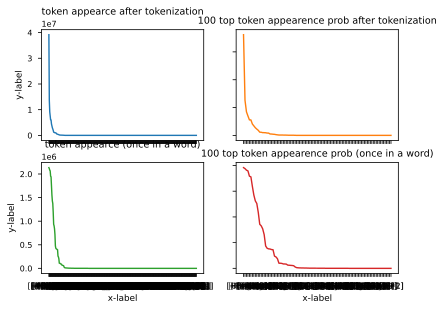

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(sorted_dict.keys(), sorted_dict.values())
axs[0, 0].set_title('token appearce after tokenization')
axs[0, 1].plot(normal_dict.keys(), normal_dict.values(), 'tab:orange')
axs[0, 1].set_title('100 top token appearence prob after tokenization')
axs[1, 0].plot(sorted_dict_selfie.keys(),
               sorted_dict_selfie.values(),'tab:green')
axs[1, 0].set_title('token appearce (once in a word)')
axs[1, 1].plot(normal_dict_selfie.keys(), normal_dict_selfie.values(), 'tab:red')
axs[1, 1].set_title('100 top token appearence prob (once in a word)')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

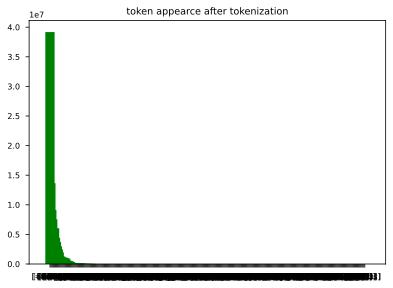

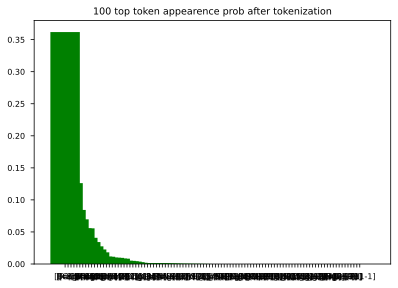

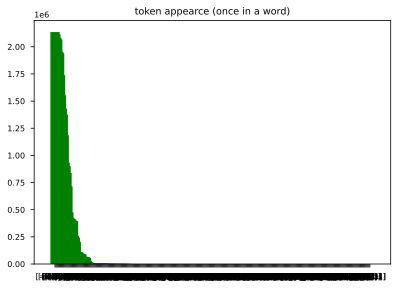

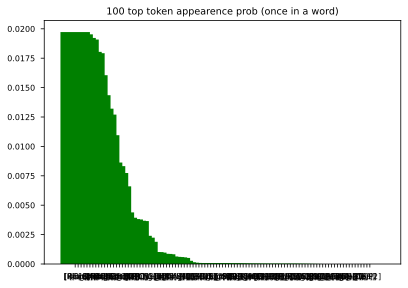

In [ ]:
plt.bar(sorted_dict.keys(), sorted_dict.values(), width=10, color='g')
plt.title('token appearce after tokenization')
plt.show()
plt.bar(normal_dict.keys(), normal_dict.values(), width=10, color='g')
plt.title('100 top token appearence prob after tokenization')
plt.show()

plt.bar(sorted_dict_selfie.keys(), sorted_dict_selfie.values(), width=10, color='g')
plt.title('token appearce (once in a word)')
plt.show()
plt.bar(normal_dict_selfie.keys(), normal_dict_selfie.values(), width=10, color='g')
plt.title('100 top token appearence prob (once in a word)')
plt.show()


In [ ]:
# fda = '/content/gdrive/MyDrive/Drug_design/fda.csv'
# data = pd.read_csv(fda)

# data = 'Data/chembl/selfie_vae.pkl'
data_params = {'tvt_split': [0.8,0.2, 0], 'type_of_encoding': 0}

# data = pd.read_csv('Data/chembl.csv')

# sample_data = data.sample(100000)
# sample_data.to_csv('Data/chembl_10.csv', index=False)

d_path = '/content/gdrive/MyDrive/A_JAK_design/Data/chembl/'

if data_params['type_of_encoding'] == 1:
    selfie_path = d_path + 'selfie.pkl'
    with open(selfie_path, 'rb') as f:
        d = pickle.load(f)
    alphabet = d['selfies_alphabet']# # 341
    max_len  = d['largest_selfies_len'] # 1281
elif data_params['type_of_encoding'] == 0:
    smile_path = d_path + 'smile.pkl'
    with open(smile_path, 'rb') as f:
        d = pickle.load(f)
    alphabet = d['smiles_alphabet']
    max_len = d['largest_smiles_len']
print(len(alphabet), max_len, alphabet)



# for i in range(10):
#     test = dataset_sVAE(data.sample(n = 10000))
#     _, a, l = test.get_info()
#     assert '.' in a
# _, data_info_dict = train_test_split_svae(data.sample(30000), **data_params)


50 2392 ['n', 'Z', 'r', ')', 'N', 'K', 'I', 'i', 'b', 'B', 'R', 'a', 'X', '6', '(', 'A', 'C', '+', '7', '\\', '-', '0', 'H', '5', '[', 'O', ']', 'l', 'P', 'F', '@', 'T', 'S', '=', '/', '%', '9', 'L', '8', 'g', 'M', '.', 's', '2', '4', '3', 'e', '#', '1', ' ']


In [ ]:
al = dd['selfies_alphabet']

In [ ]:
enc_params = {
    'layer_1d': 256, 'layer_2d': 128, 'layer_3d': 64, 'latent_dim': 50}
dec_params = {
    'latent_dim': 50, 'gru_neurons_num': 128, 'gru_stack_size': 1}
train_params = {
    'KLD_alpha': 1.0e-03, 'lr_enc': 0.001, 'lr_dec': 0.001,
    'num_epochs': 5000, 'sample_num': 1000, 'sampling': True,
    'batch_size': 256*2}
data_params = {'tvt_split': [0.8,0.2, 0], 'type_of_encoding': 1,
               'alphabet': None, 'mol_len': None}
import pandas as pd
data = pd.read_csv('Data/chembl_10.csv')

_, data_info_dict = train_test_split_svae(data, **data_params)

train_model(**train_params, **data_info_dict,
enc_params=enc_params, dec_params=dec_params)

NameError: ignored

In [ ]:

# plot_training_process(data, 'a')

341 1281
50 2392


In [ ]:
'.' in new_d['selfies_alphabet']

False

In [ ]:

# model_path = 'model/checkpoint/selfies_vae/'
# data = model_path +'quality_list.pkl'
# with open(data, 'rb') as f:
#     d = pickle.load(f)
# assert d['train'].keys() == d['valid'].keys()
# plt.plot(d['train'].keys(), d['train'].values(), label='train')
# plt.plot(d['valid'].keys(), d['valid'].values(), label='valid')
# plt.xlabel('epoch')
# plt.ylabel('quality %')
# plt.title('svae')
# plt.legend()
# plt.show()

In [ ]:
# d['train'].keys, d['valid'].keys
# d['train'].values(), d['valid']

True

In [ ]:
import torch
enc = torch.load('model/selfies_selfies/10/E')
dec = torch.load('model/selfies_selfies/10/D')

FileNotFoundError: ignored

In [ ]:
d = torch.rand(1, 1, 50)
print(d.shape)
h = enc.init_hidden()
enc(d, h)

In [ ]:
# class sVAE(nn.Module):
#     def __init__(self, in_dim, layer_1d, layer_2d, layer_3d, latent_dim,
#                  gru_stack_size, gru_neurons_num, out_dim,):
#         super(sVAE, self).__init__()
#         self.encoder = VAEEncoder(in_dim, layer_1d, layer_2d, layer_3d,
#                                   latent_dim)
#         self.decoder = VAEDecoder(latent_dim, gru_stack_size,
#                                   gru_neurons_num, out_dim)

#     def encode(self, x):
#         z, mu, log_var = self.encoder(x)
#         de

In [ ]:
d = multiple_smile_to_hot(['ccc', 'coc'], 5, ['c', 'o', ' '])
type(d), d.shape

(numpy.ndarray, (2, 5, 3))

In [ ]:
d.shape[0]

2

In [ ]:
dicta = {'1': 2, '3': 4}
dictb = dicta.copy()
dicta, dictb

dictb['d'] = 4
dict_merge(dicta, dictb), dicta, dictb
# assert dicta == dictb

({'1': 2, '3': 4, 'd': 4}, {'1': 2, '3': 4}, {'1': 2, '3': 4, 'd': 4})

use selfies for vae


smi-> sf -> smi check: 100%|██████████| 3/3 [00:00<00:00, 439.67it/s]

all smiles are valid and convertible to selfies
Data/for_sVAE/  folder is in directory:  True



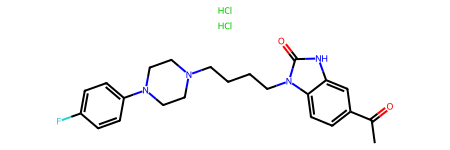

In [ ]:
params = {'batch_size': batch_size, 'shuffle': True,
          'drop_last': False, 'num_workers': 0}

params_test = {'batch_size': batch_size, 'shuffle': True,
          'drop_last': False, 'num_workers': 0}

train_loader = DataLoader(data_train, **params)
test_loader = DataLoader(data_valid, **params_test)


In [ ]:
a = [1, 2, 3]
b = a.copy()
b.append(1)
a, b

([1, 2, 3], [1, 2, 3, 1])

In [ ]:
def train(epoch, train_loader, encoder, decoder, optimizer):
    model.train()
    train_loss = 0
    for idx, (smi, onehot, int_enc) in enumerate(train_loader):
        data to device

        data_hat = model(something)
        optimizer.zero_grad()
        loss = loss function

        loss.backward()
        train_loss += loss.detach().cpu().numpy()
        optimizer.step()

    print('====> Epoch: {} Average loss: {:.4f}'.format(
            epoch, train_loss / len(train_loader.dataset)))

    return  float(train_loss / len(train_loader.dataset))



In [ ]:
a1 = [1, 2, 4]
d = a1
d.append(1)
a1, d

([1, 2, 4, 1], [1, 2, 4, 1])

NameError: ignored